# Instruções da prova

- O único material que poderá ser consultado é este notebook, consultas à outros materiais ou à internet será considerado cola
- Renomear o notebook para C209-PV1.1-NOME_SOBRENOME_MATRICULA
- Enviar no teams a pasta com todas as mídias zipada com o nome "NOME_SOBRENOME_MATRICULA.zip"

# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - A etapa de **quantização** em um processo de compressão de dados consiste em aumentar a aleatoriedade das informações.

In [ ]:
# F

2 - Compresão do tipo fractal consiste em encontrar áreas similares ao redor de uma região de domínio.

In [ ]:
# V

3 - Histogramas de duas imagens distintas não serão nunca iguais

In [ ]:
# F Podem ser iguais os histogramas, já que ele diz apenas sobre a frequencia de cores, e não sobre a posição

4 - O método RLE de compressão de dados sempre gera um resultado com menor quantidade de dados (comprimido).

In [ ]:
# V

5 - No contexto de áudios, frequência de amostragem é a frequência com que são captadas amostras do audio analógico para gerar um digital.

In [ ]:
# V

# Parte prática

## Material de apoio

### Importações

```
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt
```

### Histograma
```
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

```

### Manipulação de imagens

```
(l,c,p) = img.shape
plt.imshow(imagem)
```

### Forçando uma imagem de uma página para 3 páginas
```
  imagem_3p = np.zeros(shape=(l,c,p),dtype=np.uint8)
  imagem_3p[:,:, 0] = frame_1p
  imagem_3p[:,:, 1] = frame_1p
  imagem_3p[:,:, 2] = frame_1p
```

### Detecção de bordas
```
    imagem_grey = np.average(frame, axis=2).astype(np.float64)
   
    abs_tg_c = np.abs(np.diff(imagem_grey.astype(np.float64), axis=0, append=255))
    abs_tg_l = np.abs(np.diff(imagem_grey.astype(np.float64), axis=1, append=255))
    abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

    imagem_border = np.zeros(shape=(l, c), dtype=np.uint8)
    imagem_border[abs_tg > threshold] = 255
```

### Manipulação de vídeo
```
video = mpe.VideoFileClip("video.mp4")
frame = video.get_frame(2 / video.fps)
frame = video.get_frame(2)
video.ipython_display(width=480)
video_modificado = video.fl_image(func_modificar)
subclip = video.subclip(0,2)
subclip = video.subclip(3)
parts = mpe.concatenate_videoclips([part1, part])
video.write_videofile('video.mp4')
```

### Imagem binária
```
 image_bw = np.average(frame, axis=2).astype(np.float64)
 image_bin = np.zeros(shape=(l,c),dtype=np.uint8)
 image_bin[image_bw > thresh] = 255
```

### Reflexão

#### Numpy (recomendado)
```
    img_refl = np.zeros(shape=imagem.shape, dtype=np.uint8)
    img_refl[::1, ::-1] = imagem
```

#### Iterativo (mais lento)
```
img_refl = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        img_refl[new_y, new_x] = img[i, j]
```


**1 -** Importe as bibliotecas que serão usadas

In [2]:
!pip install moviepy==1.0.3

Invalid macro definition.
  Using cached moviepy-1.0.3-py3-none-any.whl
  Using cached decorator-4.4.2-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached imageio-2.36.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached imageio_ffmpeg-0.5.1-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached proglog-0.1.10-py3-none-any.whl.metadata (639 bytes)
  Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached charset_normalizer-3.4.0-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
Using cached imageio-2.36.1-py3-none-any.whl (315 kB)
Using cached imageio_ffmpeg-0.5.1-py3-none-win_amd64.whl (22.6 MB)

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import sounddevice as sd 
import moviepy.editor as mpe

**2 -** Abra o vídeo "boydancing.mp4" e salve-o em uma variável, pegue o **frame do segundo 3** e o exiba.

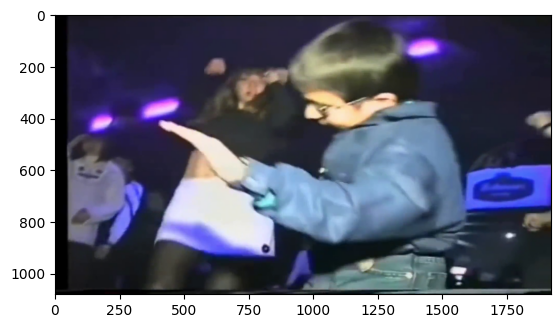

In [31]:
video = mpe.VideoFileClip('boydancing.mp4')
frame3 = video.get_frame(3)
plt.imshow(frame3)

**3 -** Exiba o histograma RGB do frame selecionado.

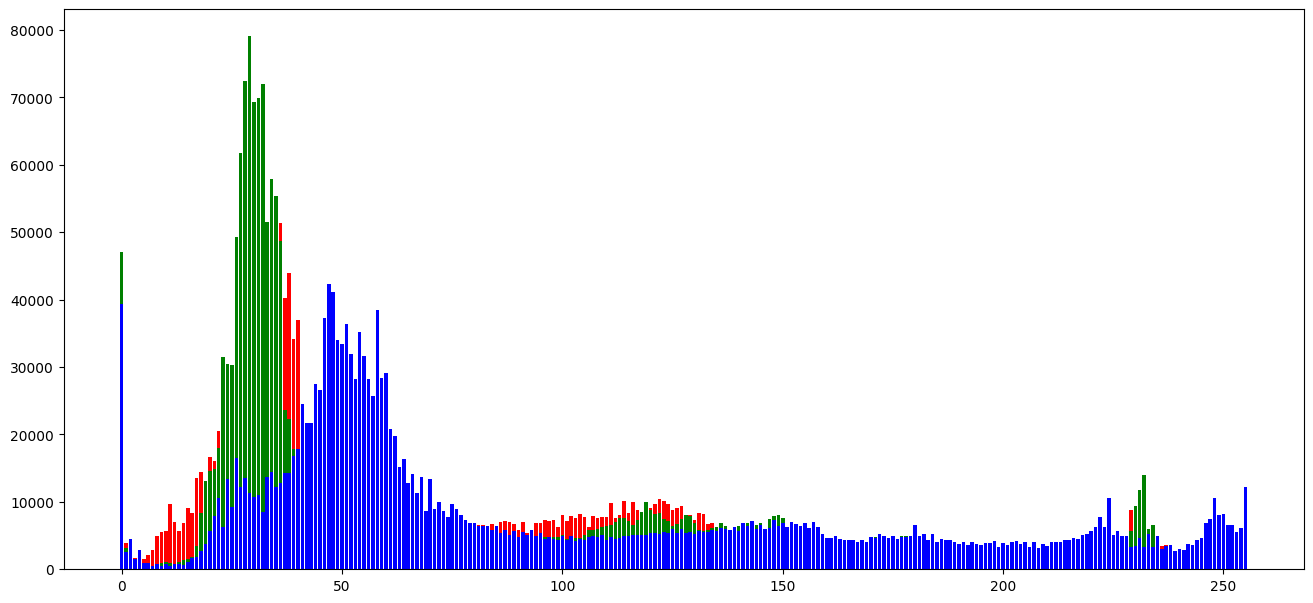

In [25]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

show_histogram(frame3)


**4 -** Crie uma função que receba um frame e retorne um frame em imagem binário com **treshold de 130**, aplique essa função no vídeo e observe o resultado. **Sua função deve retornar um frame com 3 páginas para evitar problemas**.

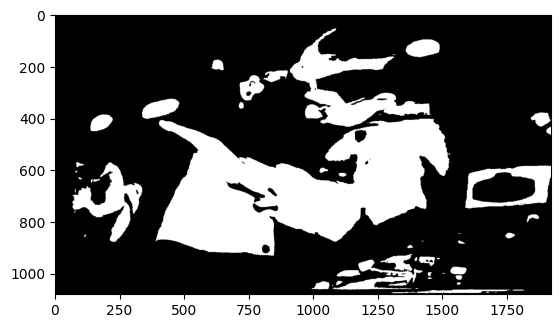

In [27]:
def thres(frame, tvalue):
    frame = frame[:,:,:3]
    image_bw = np.average(frame, axis=2).astype(np.float64)
    image_bin = np.zeros(shape=(frame.shape[0], frame.shape[1]),dtype=np.uint8)
    image_bin[image_bw > tvalue] = 255
    return image_bin

binario = thres(frame=frame3, tvalue=130)
plt.imshow(binario, cmap='grey')



**5 -** Crie uma função que receba um frame e realize a detecção de bordas nele com **treshold de valor 12**, aplique essa função no vídeo e observe o resultado. **Sua função deve retornar um frame com 3 páginas para evitar problemas**.

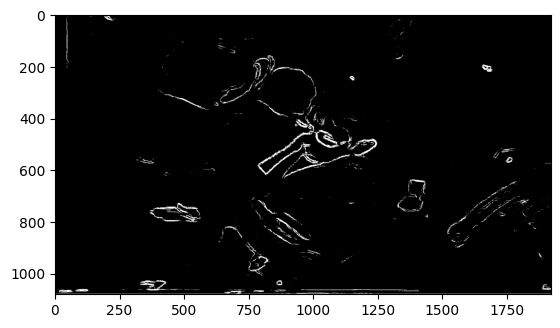

In [35]:
def borda(frame, thresval):
    imagem_grey = np.average(frame, axis=2).astype(np.float64)
   
    abs_tg_c = np.abs(np.diff(imagem_grey.astype(np.float64), axis=0, append=255))
    abs_tg_l = np.abs(np.diff(imagem_grey.astype(np.float64), axis=1, append=255))
    abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

    imagem_border = np.zeros(shape=(frame.shape[0], frame.shape[1]), dtype=np.uint8)
    imagem_border[abs_tg > thresval] = 255
    return imagem_border


f = borda(video.get_frame(1), 12)
plt.imshow(f, cmap='grey')

**6 -** Crie uma função que receba um frame e retorne um frame refletido em relação ao eixo x, aplique essa função no vídeo e observe o resultado. 

**7 -** Separe o vídeo original em 3 subclips:
- Segundos 0 ao 2: Aplicar conversão para binário
- Segundos 2 ao 4: Aplicar reflexão no eixo x
- Segundos 4 em diante: Aplicar detecção de borda

**Una esses clips em um único vídeo e exiba o resultado.**

**8 -** Salve o vídeo resultante da última etapa com o nome "resultado.mp4".